## Load modules and parameters

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.layers import Dense
from keras.layers.recurrent import SimpleRNN, LSTM
from keras.models import Sequential

## PARAMETERS ##
batch_size = 256
n_epochs = 3000
seq_len = 60
rnn_nodes = 10
################

Using TensorFlow backend.


## GENERATE DATA
    [1, 0, 1, 1, 0, 1] --> [1, 1, 2, 3, 3, 4]

In [2]:
def generate_batch(n=batch_size):
    X = np.random.choice(a=[0, 1], size = n*seq_len, p=[0.9, 0.1]).reshape(n, -1)
    y = np.cumsum(X, axis=1)
    X = X.reshape(n, -1, 1)
    y = y.reshape(n, -1, 1)
    return(X, y)
# generate_batch(1)

## Build Architecture

In [3]:
model = Sequential()
model.add(LSTM(rnn_nodes, input_shape=(seq_len, 1), return_sequences=True))
model.add(Dense(1))
%time model.compile(loss='mse', optimizer='adam')

Wall time: 31.2 ms


## Train

0 14.4761499166
100 0.103403661866
200 0.0687892574351
300 0.010572667059
400 0.00574042057269
500 0.00696980232897
600 0.00295976582856
700 0.00120049095858
800 0.000544413669559
900 0.00549790731748
1000 0.00176742021722
1100 0.00159766379511
1200 0.000515048632224
1300 0.000246065961619
1400 0.000154359569024
1500 0.000191295373952
1600 0.00033776860073
1700 0.00035474917604
1800 0.000376218931706
1900 0.000242487645664
2000 9.75761704467e-05
2100 8.14419809103e-05
2200 0.00104044146428
2300 9.22915487536e-05
2400 0.00338209496113
2500 0.000110392789793
2600 0.000144943412124
2700 0.000184274256753
2800 0.000119096039271
2900 8.03541224741e-05


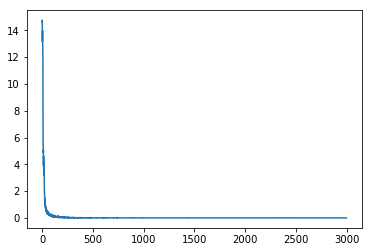

In [4]:
history = []
# from tqdm import trange
# iters = trange(n_epochs)
for i in range(n_epochs):
    X, y = generate_batch()
    hist = model.fit(X, y, verbose=0, epochs=1)
    history.extend(hist.history['loss'])
    if i%100 == 0:
        print(i, model.evaluate(X, y, verbose=0))
#         iters.set_description(str(np.mean(history[-10:])))
plt.plot(history)

## Predict

In [5]:
x, y = generate_batch(1000)
y_pred = np.round(model.predict(x))
# print(np.squeeze(x), '\n'*2, np.squeeze(y_pred))
print(np.mean(np.absolute(np.squeeze(y - y_pred))))

0.0003
